In [684]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 10)
sns.set(style="whitegrid") 

pd.options.display.float_format = '{:20,.2f}'.format 

import warnings
warnings.filterwarnings('ignore')

Segunda parte - Visualización de datos (10 ptos)

1. (6 ptos) Elegir 3 de los siguientes datasets:

  ● Proyectando el comportamiento de la soja
    ● ¿Llevo paraguas? Pronosticando la lluvia
    ● Predicción de éxitos en oportunidades comerciales
    ● Clasificación de preguntas de clientes
    ● MELI Data Challenge 2021
    ● Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines
    ● DengAI: Predicting Disease Spread


Realizar dos visualizaciones para cada uno que expliquen la variable a predecir
conteniendo al menos cada uno de los siguientes tipos de plots:
    ● Bar plot
    ● Histograma
    ● Violin plot
    ● Box plot
    ● Heatmap


In [685]:
df_oportunidades = pd.read_csv('oportunidades_comerciales.csv')
#df_oportunidades.head().T

In [686]:
df_oportunidades['Last_Modified_Date'] = pd.to_datetime(df_oportunidades['Last_Modified_Date'])

df_oportunidades['Opportunity_Created_Date'] = pd.to_datetime(df_oportunidades['Opportunity_Created_Date'])

df_oportunidades['Tiempo_Total'] = (df_oportunidades['Last_Modified_Date'] - df_oportunidades['Opportunity_Created_Date'])
df_oportunidades['Tiempo_Total'] = df_oportunidades['Tiempo_Total'].transform(lambda x: ((x.total_seconds()/(60*60*24)))).astype(int)

df_oportunidades['Last_Modified_Date'] = pd.to_datetime(df_oportunidades['Last_Modified_Date'])
df_oportunidades['Last_Modified_Date_MM'] = pd.DatetimeIndex(df_oportunidades['Last_Modified_Date']).month.astype(int)


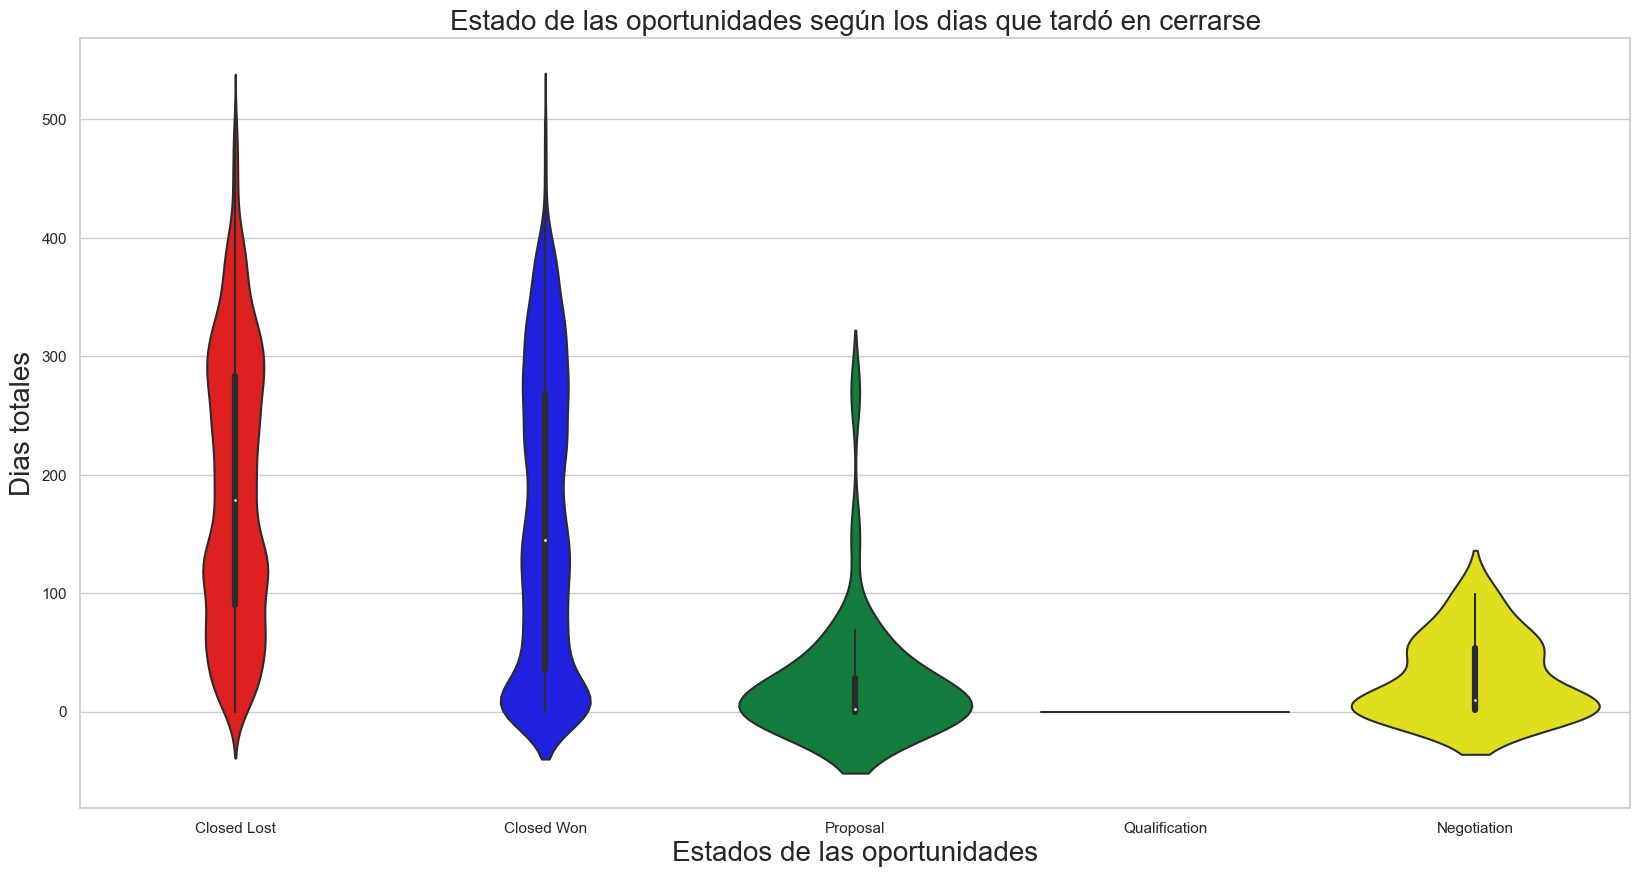

In [725]:
df_plot_oportunidades = df_oportunidades.loc[df_oportunidades.Tiempo_Total < 500]

colors_list = ['#FF0000', '#0000FF',  '#008f39', '#FF8000', '#FFFF00']
fig, axes = plt.subplots()

sns.violinplot('Stage','Tiempo_Total', data=df_plot_oportunidades, ax = axes, palette=colors_list)#, hue='Stage')

axes.set_title('Estado de las oportunidades según los dias que tardó en cerrarse',fontsize=20)
axes.set_xlabel('Estados de las oportunidades', fontsize=20)
axes.set_ylabel('Dias totales',fontsize=20)

plt.show()

In [688]:
pf_pivot_MM_last_modified = df_oportunidades[(df_oportunidades.Stage == 'Closed Lost') | (df_oportunidades.Stage == 'Closed Won')]
pf_pivot_MM_last_modified = pf_pivot_MM_last_modified.pivot_table(index='Last_Modified_Date_MM', \
                    columns='Stage',values='ID', aggfunc='count')#.sort_values(by = ['Closed Won'], ascending = False)
#pf_pivot_MM_last_modified

Text(0.5, 1.0, 'Estados de las oportunidades segun su mes de ultima modificacion')

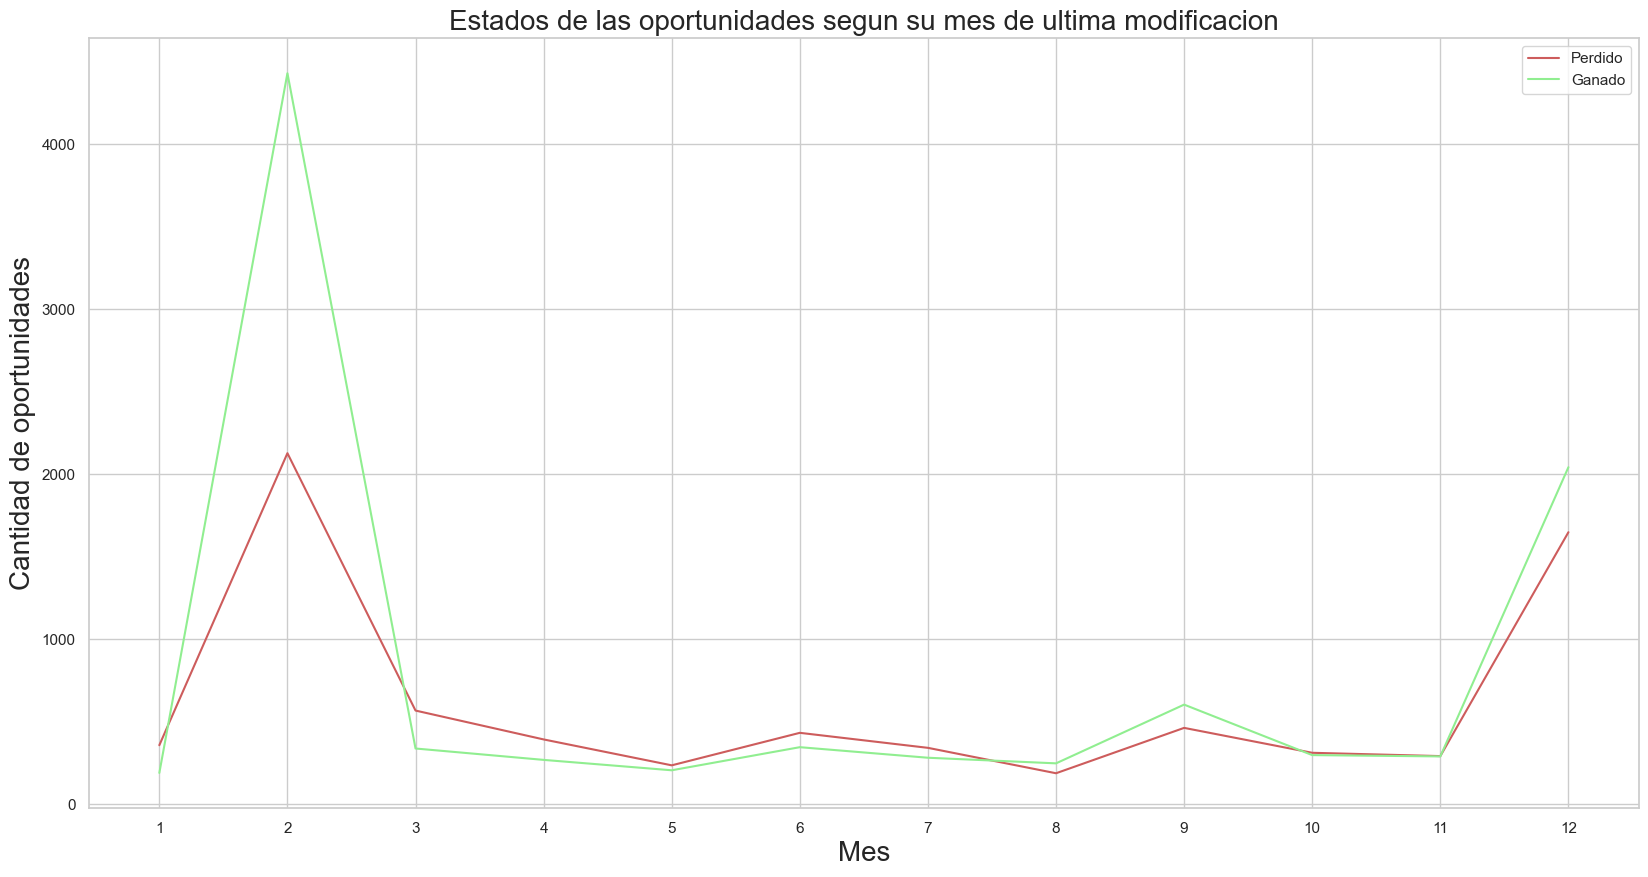

In [689]:
index = pf_pivot_MM_last_modified.index.tolist()
g = pf_pivot_MM_last_modified.plot(xticks = index ,color= ['indianRed','lightGreen'])
g.legend(["Perdido", "Ganado"])
g.set_ylabel('Cantidad de oportunidades',fontsize=20)
g.set_xlabel('Mes',fontsize=20)
g.set_title("Estados de las oportunidades segun su mes de ultima modificacion", fontsize=20)#, bbox=dict(facecolor='green', alpha=0.5))

# H1N1

In [690]:
df_H1N1_parte_1 = pd.read_csv('H1NI1_training_set_features.csv')
#df_H1N1_parte_1.head().T

In [691]:
df_H1N1_labels = pd.read_csv('H1N1_training_set_labels.csv')
df_H1N1_labels.head().T

,0,1,2,3,4
respondent_id,0,1,2,3,4
h1n1_vaccine,0,0,0,0,0
seasonal_vaccine,0,1,0,1,0


In [692]:
df_H1N1 = pd.merge(df_H1N1_parte_1, df_H1N1_labels, on='respondent_id', how='inner')
#df_H1N1.head().T

In [693]:
df_bar_plot = df_H1N1.groupby(['opinion_h1n1_vacc_effective','h1n1_vaccine'])['h1n1_vaccine'].agg({'count'})
df_bar_plot.columns =['cantidad']
df_bar_plot = df_bar_plot.reset_index()
df_bar_plot = df_bar_plot.pivot(index='opinion_h1n1_vacc_effective', columns='h1n1_vaccine',values='cantidad')
df_bar_plot.columns = ['no vacunado', 'vacunado']
#df_bar_plot

Text(0, 0.5, 'Cantidad de personas')

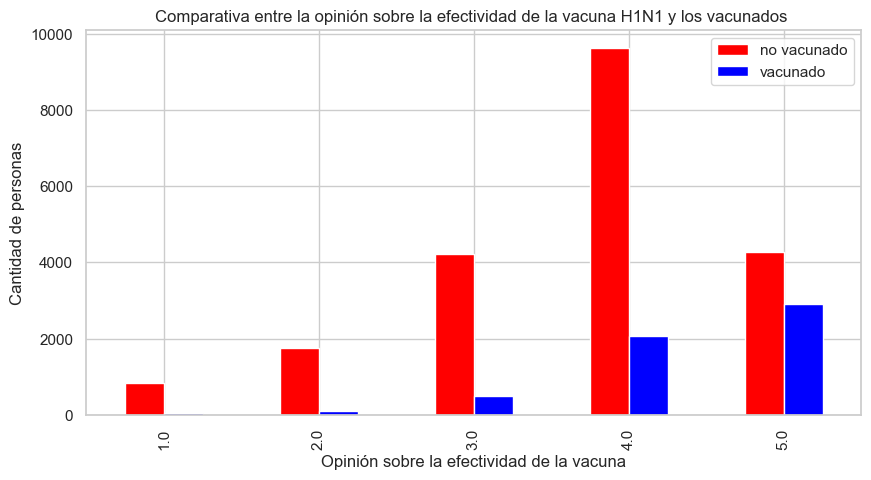

In [710]:
colores = ['red', 'blue']

df_bar_plot.plot(kind = 'bar', color=colores, figsize = (10, 5),  title = "Comparativa entre la opinión sobre la efectividad de la vacuna H1N1 y los vacunados ")
plt.xlabel('Opinión sobre la efectividad de la vacuna', fontsize= 12)
plt.ylabel("Cantidad de personas", fontsize= 12)


In [695]:
vacunaH1N1 = df_H1N1.groupby(['age_group','h1n1_vaccine']).agg({'h1n1_vaccine': 'count'})
vacunaH1N1.columns = ['cantidad']
vacunaH1N1 = vacunaH1N1.reset_index()
vacunaH1N1 = vacunaH1N1.pivot(index='age_group',columns='h1n1_vaccine',values='cantidad')
vacunaH1N1.columns = ['no vacunado H1N1', 'vacunado H1N1']
vacunaH1N1

,no vacunado H1N1,vacunado H1N1
age_group,,
18 - 34 Years,4224,991
35 - 44 Years,3087,761
45 - 54 Years,4218,1020
55 - 64 Years,4212,1351
65+ Years,5292,1551


In [696]:
vacunaSeasonal = df_H1N1.groupby(['age_group','seasonal_vaccine']).agg({'seasonal_vaccine': 'count'})
vacunaSeasonal.columns = ['cantidad']
vacunaSeasonal = vacunaSeasonal.reset_index()
vacunaSeasonal = vacunaSeasonal.pivot(index='age_group',columns='seasonal_vaccine',values='cantidad')
vacunaSeasonal.columns = ['no vacunado estacional', 'vacunado estacional']
vacunaSeasonal

,no vacunado estacional,vacunado estacional
age_group,,
18 - 34 Years,3731,1484
35 - 44 Years,2453,1395
45 - 54 Years,3136,2102
55 - 64 Years,2719,2844
65+ Years,2233,4610


In [697]:
vacunaH1N1 = vacunaH1N1.reset_index()
vacunaSeasonal = vacunaSeasonal.reset_index()

In [698]:
vacuna_full = pd.merge(vacunaH1N1, vacunaSeasonal, on= 'age_group', how='outer')
vacuna_full = vacuna_full.set_index('age_group')
vacuna_full = vacuna_full.sort_index(ascending=False)
vacuna_full

,no vacunado H1N1,vacunado H1N1,no vacunado estacional,vacunado estacional
age_group,,,,
65+ Years,5292,1551,2233,4610
55 - 64 Years,4212,1351,2719,2844
45 - 54 Years,4218,1020,3136,2102
35 - 44 Years,3087,761,2453,1395
18 - 34 Years,4224,991,3731,1484


'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 
'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 
'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn',
'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu',
'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 
'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 
'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r',
'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 
'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 
'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg',
'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 
'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 
'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 
'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 
'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted',
'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'"

Text(217.25, 0.5, 'Rango de edad')

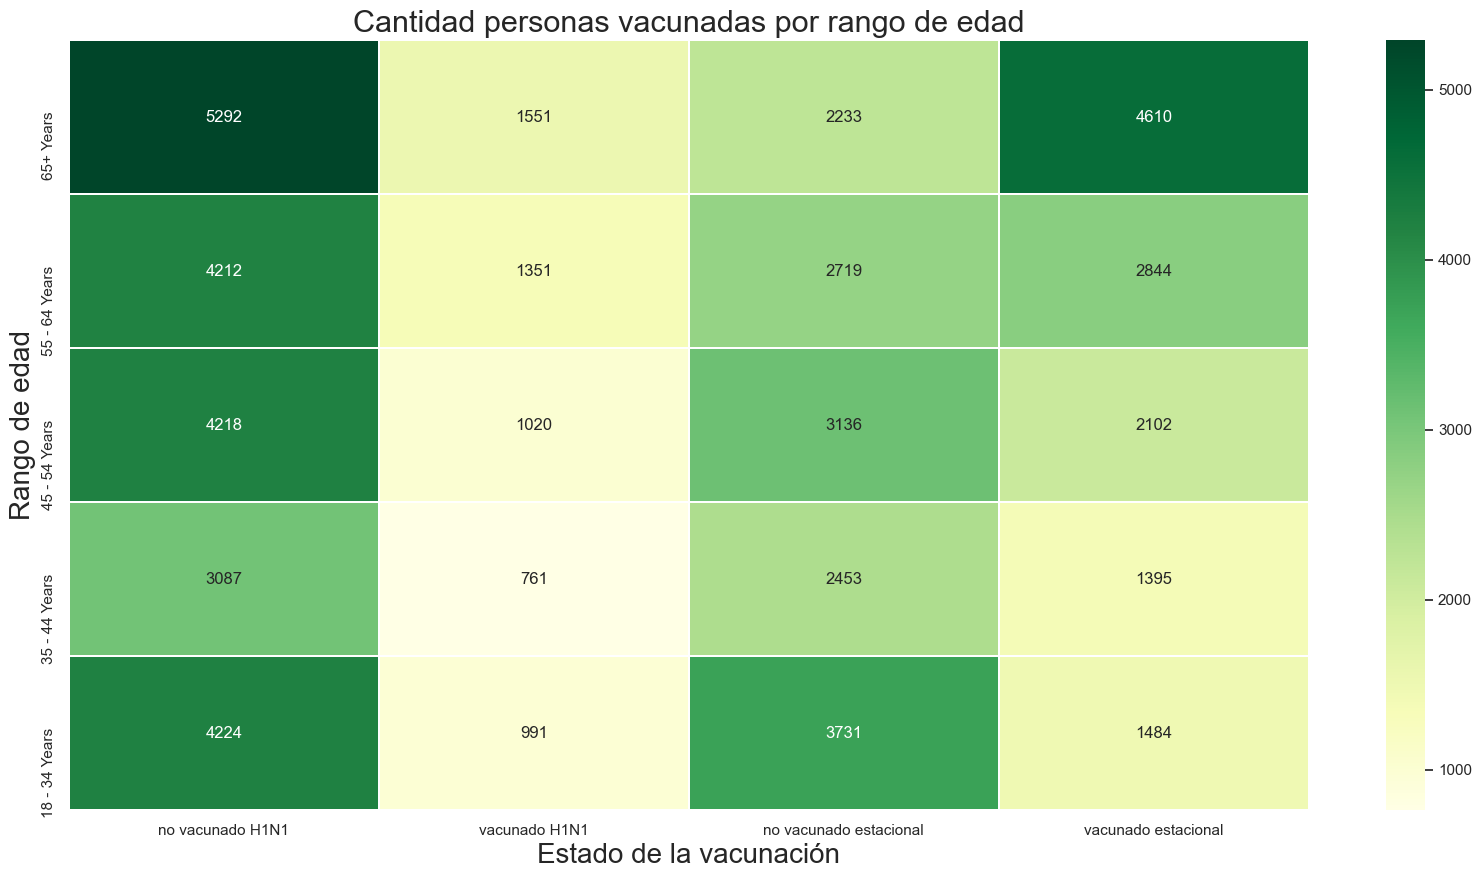

In [722]:
g = sns.heatmap(vacuna_full, linewidths=.5, cmap="YlGn", annot=True, fmt="d")
g.set_title("Cantidad personas vacunadas por rango de edad", fontsize=22)
g.set_xlabel("Estado de la vacunación",fontsize=20)
g.set_ylabel("Rango de edad", fontsize=20)

# Dengue

In [701]:
df_dengue_features = pd.read_csv('dengue_features_train.csv')
#df_dengue_features.T

In [702]:
df_dengue_labels = pd.read_csv('dengue_labels_train.csv')
#df_dengue_labels

In [731]:
df_dengue = pd.merge(df_dengue_features, df_dengue_labels, on=['city','year', 'weekofyear'])
df_dengue.T

,0,1,2,3,4,5,6,7,8,9,...,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455
city,sj,sj,sj,sj,sj,sj,sj,sj,sj,sj,...,iq,iq,iq,iq,iq,iq,iq,iq,iq,iq
year,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,...,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010
weekofyear,18,19,20,21,22,23,24,25,26,27,...,16,17,18,19,20,21,22,23,24,25
week_start_date,1990-04-30,1990-05-07,1990-05-14,1990-05-21,1990-05-28,1990-06-04,1990-06-11,1990-06-18,1990-06-25,1990-07-02,...,2010-04-23,2010-04-30,2010-05-07,2010-05-14,2010-05-21,2010-05-28,2010-06-04,2010-06-11,2010-06-18,2010-06-25
ndvi_ne,0.12,0.17,0.03,0.13,0.20,NaN,0.11,0.07,0.10,NaN,...,0.23,0.24,0.26,0.17,0.26,0.34,0.16,0.25,0.33,0.30
ndvi_nw,0.10,0.14,0.17,0.25,0.26,0.17,0.09,0.07,0.15,0.12,...,0.29,0.26,0.26,0.16,0.27,0.32,0.16,0.15,0.25,0.23
ndvi_se,0.20,0.16,0.16,0.23,0.25,0.25,0.21,0.15,0.13,0.16,...,0.33,0.31,0.26,0.13,0.26,0.26,0.14,0.25,0.28,0.27
ndvi_sw,0.18,0.16,0.17,0.24,0.25,0.18,0.21,0.13,0.12,0.20,...,0.24,0.31,0.34,0.15,0.24,0.29,0.23,0.23,0.33,0.32
precipitation_amt_mm,12.42,22.82,34.54,15.36,7.52,9.58,3.48,151.12,19.32,14.41,...,86.70,26.00,73.97,59.40,1.15,55.30,86.47,58.94,59.67,63.22
reanalysis_air_temp_k,297.57,298.21,298.78,298.99,299.52,299.63,299.21,299.59,299.58,300.15,...,298.44,299.05,297.62,297.28,297.65,299.33,298.33,296.60,296.35,298.10


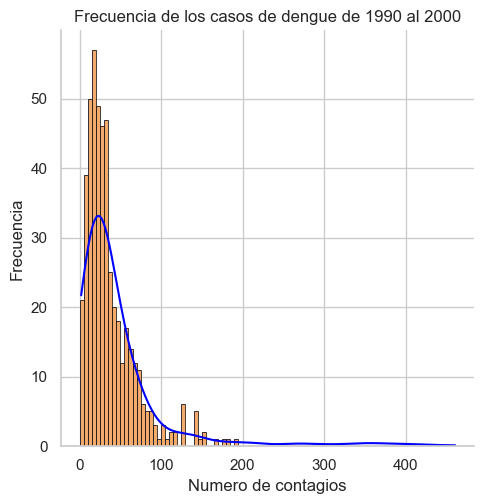

In [733]:
df_hist = df_dengue.loc[df_dengue.year < 2000]
intervalos = range(0,200 + 2, 5)

sns.displot(df_hist['total_cases'], color='#0000FF', bins=intervalos, kde=True)

plt.hist(x=df_hist['total_cases'], bins=intervalos, color='#F2AB6D', rwidth=10, edgecolor = 'black',  linewidth=0.5)
plt.title('Frecuencia de los casos de dengue de 1990 al 2000')
plt.xlabel('Numero de contagios')
plt.ylabel('Frecuencia')

plt.show()

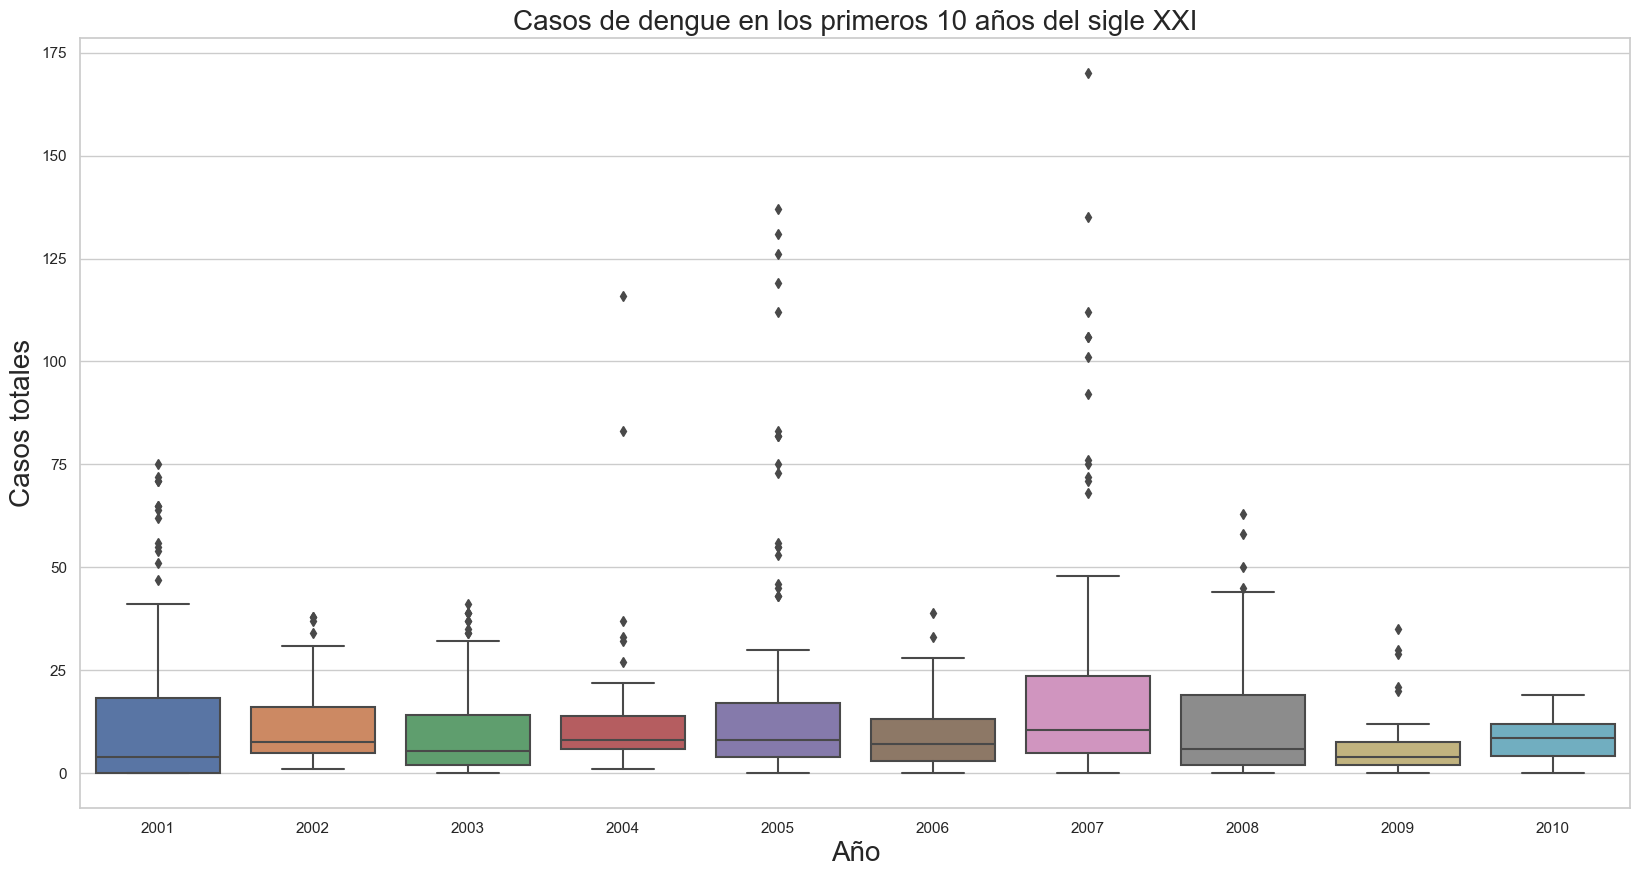

In [739]:
fontsize = 20

colores = ['red', 'blue', 'green', 'yellow']
colores = sns.color_palette(n_colors=12) #tecnicamente no los elijo yo sino sns

df_dengue_plot = df_dengue.loc[(df_dengue.year > 2000) & (df_dengue.year < 2011)]

fig, axes = plt.subplots()

ax = sns.boxplot(x="year", y="total_cases", data=df_dengue_plot,  orient="v", palette = colores)

axes.set_title('Casos de dengue en los primeros 10 años del sigle XXI', fontsize = 20)
axes.set_xlabel('Año', fontsize = 20)
axes.set_ylabel('Casos totales', fontsize = 20)

plt.show()

In [707]:
#colores = sns.color_palette("flare", n_colors=5)
colores = sns.color_palette(n_colors=5)

colores

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)]

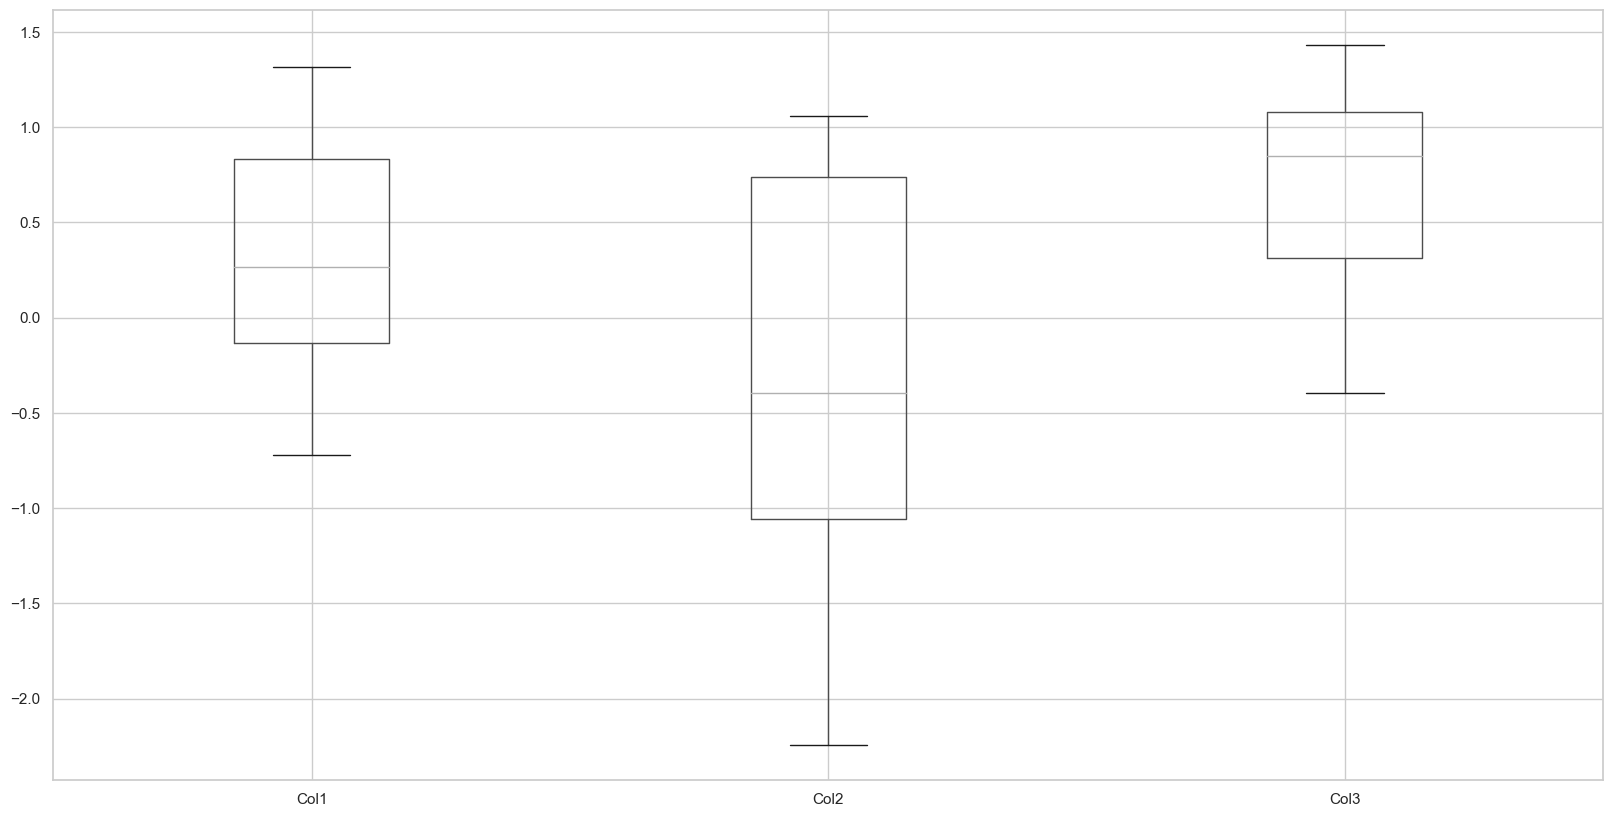

In [708]:
import numpy as np
np.random.seed(1234)

df = pd.DataFrame(np.random.randn(10, 4),
                  columns=['Col1', 'Col2', 'Col3', 'Col4'])
boxplot = df.boxplot(column=['Col1', 'Col2', 'Col3'])


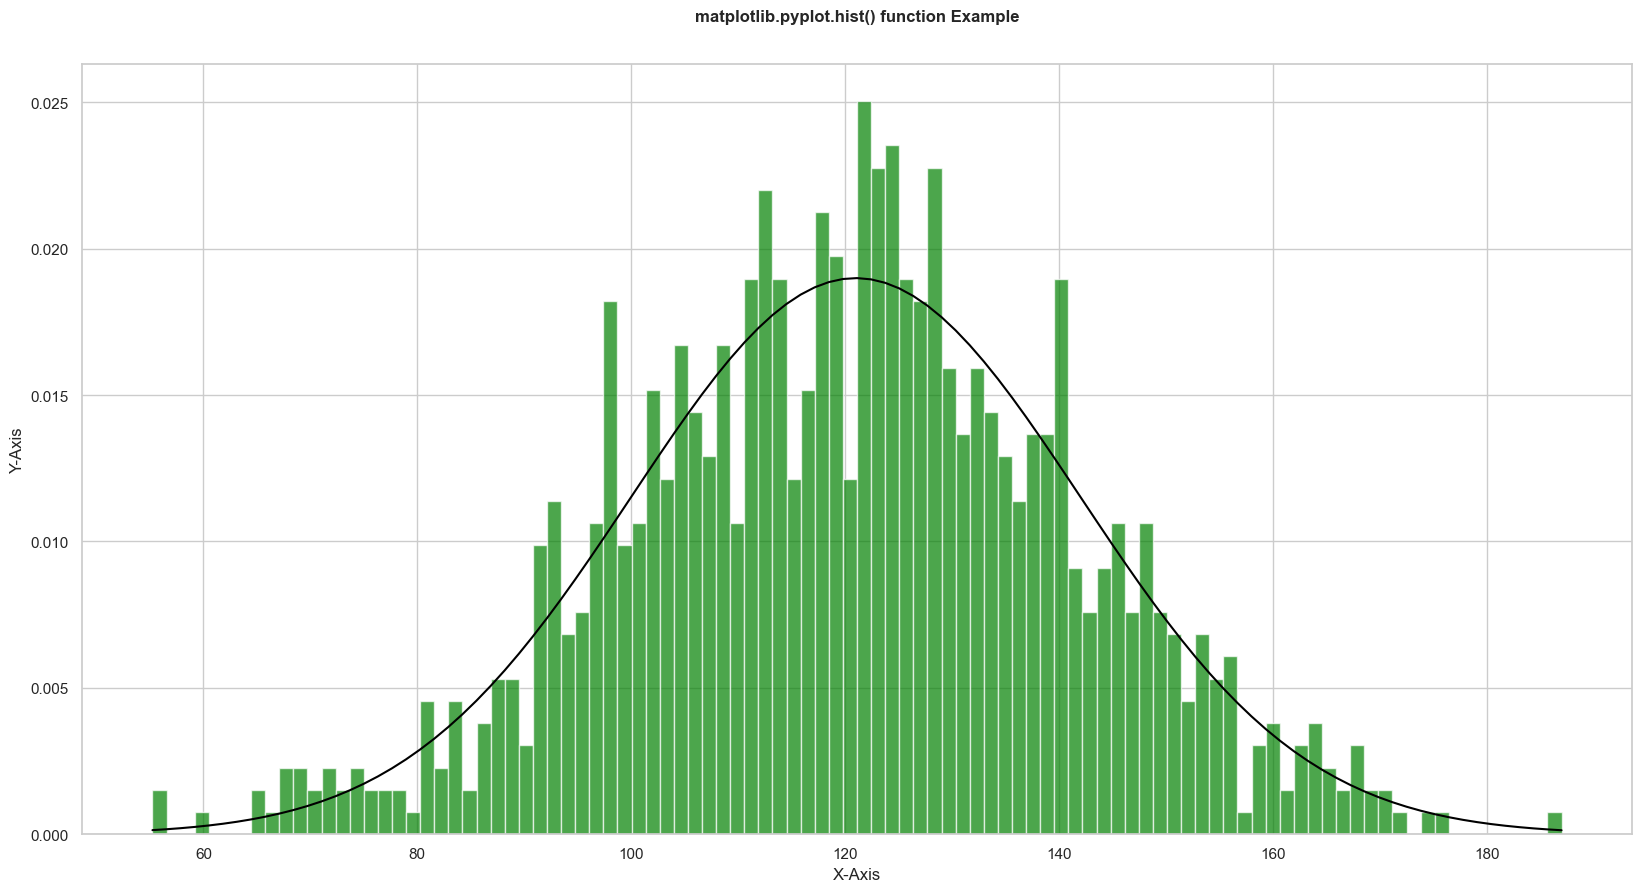

In [709]:

np.random.seed(10**7)
mu = 121 
sigma = 21
x = mu + sigma * np.random.randn(1000)
   
num_bins = 100
   
n, bins, patches = plt.hist(x, num_bins, 
                            density = 1, 
                            color ='green',
                            alpha = 0.7)
   
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
  
plt.plot(bins, y, '-', color ='black')
  
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
  
plt.title('matplotlib.pyplot.hist() function Example\n\n',
          fontweight ="bold")
  
plt.show()